In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
data=datasets.load_iris()
data=pd.DataFrame(data.data, columns=['sepal length (cm)','sepal width (cm)','petal length (cm)',
'petal width (cm)'])

In [2]:
import pandas as pd
def mean_impl(data):
    data=np.asarray(data)
    s=data.sum()/len(data)
    return s
#mean_impl(data.iloc[:,0:1])

In [3]:
def covariance_implmentation(data):
    size=data.shape[1]
    a=(np.asarray(data.iloc[:,0:1])-mean_impl(data.iloc[:,0:1]))
    if(size==2):
        b=(np.asarray(data.iloc[:,1:2])-mean_impl(data.iloc[:,1:2]))
    else:
        b=(np.asarray(data.iloc[:,0:1])-mean_impl(data.iloc[:,0:1]))
    p=((a*b).sum())
    return p/(data.shape[0]-1)
covariance_implmentation(data.iloc[:,0:2])

-0.04243400447427292

In [4]:
def Covariance_matrix(data):
    result=[]
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            result.append(covariance_implmentation(data.iloc[:,[i,j]]))
    print(np.asarray(result).reshape(data.shape[1],data.shape[1]))
Covariance_matrix(data)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


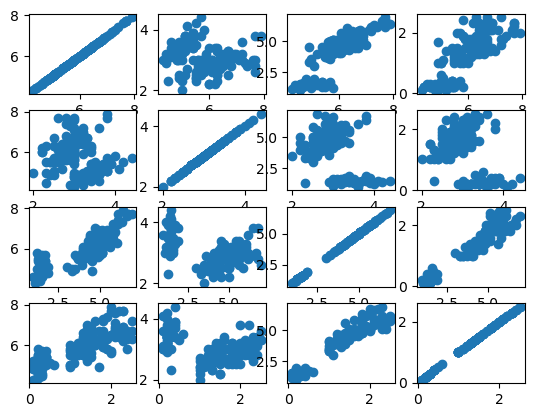

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
def scatterplot_impl(data):
    p=1
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            plt.subplot(data.shape[1],data.shape[1],p)
            plt.scatter(data.iloc[:,i], data.iloc[:,j])
            p+=1
            
scatterplot_impl(data)

In [6]:
#standard deviation
def std_dev(data):
    a=mean_impl(data)
    res=np.sqrt(((np.asarray(data)-a)*(np.asarray(data)-a)).sum())
    return res
def Pearson_Corr_Impl(data):
    size=data.shape[1]
    a=(np.asarray(data.iloc[:,0:1])-mean_impl(data.iloc[:,0:1]))
    b=(np.asarray(data.iloc[:,0:1])-mean_impl(data.iloc[:,0:1]))
    p=((a*b).sum())/(std_dev(data.iloc[:,0:1])*std_dev(data.iloc[:,0:1]))
    if(size==2):
        b=(np.asarray(data.iloc[:,1:2])-mean_impl(data.iloc[:,1:2]))
        p=((a*b).sum())/(std_dev(data.iloc[:,0:1])*std_dev(data.iloc[:,1:2]))
    
    return p
Pearson_Corr_Impl(data.iloc[:,1:3])

-0.42844010433053975

In [7]:
#Rank finding for data
from  collections import Counter
def Rank_finder(data):
    c=Counter(np.asarray(data.iloc[:,0:1]).flatten())
    p = sorted(c.items(), reverse=True)
    c1=np.sort(np.asarray(data.iloc[:,0:1]).flatten())[::-1]
    cnt=0
    lst=[]
    for i in p:
        a=(((i[1]+cnt)*(i[1]+cnt+1))/2 - (cnt*(cnt+1))/2)/i[1]
        cnt=cnt+i[1]
        for j in range(i[1]):
            lst.append(a)
    arrlst=np.asarray(lst)
    final=dict(np.unique(np.stack([c1,arrlst], axis=1),axis=0)[::-1])
    rank=[]
    c1=np.asarray(data.iloc[:,0:1]).flatten()
    for ele in c1:
        rank.append(final[ele])
    return rank
#Rank_finder(data)

In [8]:
#Spearman’s rank correlation
def Spearman_Rank_Corr(data):
    c1=Counter(np.asarray(data.iloc[:,0:1]).flatten())
    c2=Counter(np.asarray(data.iloc[:,1:2]).flatten())
    data_len=data.shape[0] #Size of dataset(total records)
    value=[]
    for i in dict(c1).values():
        value.append((i*(i*i-1))/12)
    for i in dict(c2).values():
        value.append((i*(i*i-1))/12)
    value=np.asarray(list(set(value))).sum()
    rank1=np.asarray(Rank_finder(data.iloc[:,0:1])) #Rank of first feature
    rank2=np.asarray(Rank_finder(data.iloc[:,1:2])) #Rank of second feature
    dist=rank1-rank2
    dist2=(dist*dist).sum()
    r=1-(6*(dist2+value))/(data_len*(data_len*data_len-1))
    return r
Spearman_Rank_Corr(data.iloc[:,[1,1]]) #takes input as dataframe with two features

0.9958318147473221

In [9]:
def Correlation_matrix(data):
    result=[]
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            result.append(Pearson_Corr_Impl(data.iloc[:,[i,j]]))
    print(np.asarray(result).reshape(data.shape[1],data.shape[1]))
Correlation_matrix(data)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [10]:
def Correlation_matrix(data):
    result=[]
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            result.append(Spearman_Rank_Corr(data.iloc[:,[i,j]]))
    print(np.asarray(result).reshape(data.shape[1],data.shape[1]))
Correlation_matrix(data)

[[ 0.99955998 -0.164978    0.88136717  0.83061469]
 [-0.164978    0.99583181 -0.30690253 -0.28509534]
 [ 0.88136717 -0.30690253  0.99948976  0.93365661]
 [ 0.83061469 -0.28509534  0.93365661  0.99562647]]
